## Q1. Problem Statement
Alex is working on a navigation system that finds the shortest path between two locations using the
A* algorithm. Given a directed graph where nodes represent locations and edges represent paths
with weights, along with heuristic values for each node, write a program to determine the optimal
path from a starting node to a destination node. If a path exists, print the sequence of nodes in the
order they should be visited; otherwise, print that no path exists.


In [ ]:
# One test case is not passing

from collections import defaultdict

def parse_input():
    heuristic_values = {}
    while True:
        line = input().strip()
        if line.lower() == 'done':
            break
        node, h = line.split()
        node.strip()
        heuristic_values[node] = int(h)

    graph = {}

    while True:
        node = input().strip()

        if node.lower() == 'done':
            break

        or_conditions = input().strip()
        and_conditions = input().strip()

        temp2 = {}
        if or_conditions.lower() not in ["none" , ""]:
            temp2["OR"] = or_conditions.split(',')

        if and_conditions.lower() not in ["none", ""]:
            temp2["AND"] = and_conditions.split(',')

        graph[node] = temp2

    w = int(input().strip())
    return heuristic_values, graph, w

# Cost to find the AND and OR path
def Cost(H, condition, weight=1):
    cost = {}
    if 'AND' in condition:
        AND_nodes = condition['AND']
        Path_A = ' AND '.join(AND_nodes)
        PathA = sum(H[node.strip()] + weight for node in AND_nodes)
        cost[Path_A] = PathA

    if 'OR' in condition:
        OR_nodes = condition['OR']
        Path_B = ' OR '.join(OR_nodes)
        PathB = min(H[node.strip()] + weight for node in OR_nodes)
        cost[Path_B] = PathB
    return cost

# Update the cost
def update_cost(H, Conditions, weight=1):
    Main_nodes = list(Conditions.keys())
    Main_nodes.reverse()
    least_cost = {}
    for key in Main_nodes:
        condition = Conditions[key]
        print(key, ':', Conditions[key], '>>>', Cost(H, condition, weight))
        c = Cost(H, condition, weight)
        H[key] = min(c.values())
        least_cost[key] = Cost(H, condition, weight)
    return least_cost

# Print the shortest path
def shortest_path(Start, Updated_cost, H):
    Path = Start
    if Start in Updated_cost.keys():
        Min_cost = min(Updated_cost[Start].values())
        key = list(Updated_cost[Start].keys())
        values = list(Updated_cost[Start].values())
        Index = values.index(Min_cost)

        # FIND MINIMUM PATH KEY
        Next = key[Index].split()
        # ADD TO PATH FOR OR PATH
        if len(Next) == 1:
            Start = Next[0]
            Path += ' = ' + shortest_path(Start, Updated_cost, H)
        # ADD TO PATH FOR AND PATH
        else:
            Path += '=('+key[Index]+') '
            Start = Next[0]
            Path += '[' + shortest_path(Start, Updated_cost, H) + ' + '
            Start = Next[-1]
            Path += shortest_path(Start, Updated_cost, H) + ']'

    return Path


def main():
    heuristic_values, graph, w = parse_input()

    print('Updated Cost:')
    Updated_cost = update_cost(heuristic_values , graph , w)

    print('Shortest Path:\n', shortest_path('A', Updated_cost, heuristic_values))

if __name__ == "__main__":
    main()

## Q2. Problem Statement
Implement the A* search algorithm to determine the minimum path cost from a starting node to a
target node in a directed weighted graph. Each node in the graph has a list of neighbors with
corresponding edge costs, and each node also has an associated heuristic value estimating its cost to
the goal. If a path exists, output the total path cost; otherwise, output "Path does not exist!".

In [ ]:
import heapq

def astar(start, goal, edges, heuristics):
    # Create a graph from edges
    graph = {}
    for frm, to, cost in edges:
        if frm not in graph:
            graph[frm] = []
        graph[frm].append((to, cost))

    # Priority queue: stores tuples of (estimated_cost_to_goal, cost_to_node, node, path)
    queue = [(heuristics[start], 0, start, [])]
    visited = set()

    while queue:
        _, cost, current, path = heapq.heappop(queue)

        if current in visited:
            continue
        visited.add(current)

        # Output current visiting node
        print(f"Visiting: {current}")

        if current == goal:
            # Output the result when the goal is reached
            final_path = path + [current]
            print(f"Goal reached: {goal}")
            print(f"Path: {final_path}")
            print(f"Cost: {cost}")
            return

        for neighbor, travel_cost in graph.get(current, []):
            if neighbor not in visited:
                new_cost = cost + travel_cost
                estimated_cost = new_cost + heuristics.get(neighbor, float('inf'))
                heapq.heappush(queue, (estimated_cost, new_cost, neighbor, path + [current]))

def read_graph():
    import sys
    input = sys.stdin.read
    data = input().split()

    index = 0
    n = int(data[index])  # Number of nodes (unused)
    index += 1
    e = int(data[index])  # Number of edges
    index += 1
    edges = []

    for _ in range(e):
        frm = int(data[index])
        to = int(data[index + 1])
        cost = int(data[index + 2])
        edges.append((frm, to, cost))
        index += 3

    h = int(data[index])  # Number of heuristic entries
    index += 1
    heuristics = {}

    for _ in range(h):
        node = int(data[index])
        heuristic = int(data[index + 1])
        heuristics[node] = heuristic
        index += 2

    start = int(data[index])
    goal = int(data[index + 1])

    return start, goal, edges, heuristics

if __name__ == "__main__":
    start, goal, edges, heuristics = read_graph()
    astar(start, goal, edges, heuristics)


## Q3. Problem Statement
George, a financial analyst, is working on optimizing the distribution of funds across various
investment portfolios. Each investment scenario is represented as a node in a binary decision tree,
where each node decides whether to increase or decrease investment in a particular portfolio.
George aims to use a minimax algorithm with alpha-beta pruning to determine the most favorable
investment strategy, maximizing returns at various decision points.

In [ ]:
import math
def minmax(depth,node,maxplayer,alpha,beta,array,n):
    if depth==math.log2(n): # if d is given just directly compare # n is len of array
        return array[node]
    if maxplayer:
        best=float('-inf')
        for i in range(2):
            val=minmax(depth+1,node*2+i,False,alpha,beta,array,n)
            best=max(val,best)
            alpha=max(alpha,best)
            if beta<=alpha:
                break
        return best
    else:
        best=float('inf')
        for i in range(2):
            val=minmax(depth+1,node*2+i,True,alpha,beta,array,n)
            best=min(val,best)
            beta=min(beta,best)
            if beta<=alpha:
                break
        return best

n=int(input())
lis=[int(x) for x in input().split()]
print(minmax(0,0,True,float('-inf'),float('inf'),lis,n))


## Q4. Problem Statement
Julia, an environmental scientist, is working on optimizing water distribution strategies during
periods of scarcity. She is using a decision-making tool that evaluates various strategies for allocating
water to different regions based on predicted need and availability.
To improve the strategy, Julia implements a minimax algorithm with alpha-beta pruning within a
decision tree, where each node represents a decision on water distribution. Additionally, Julia
introduces a flat increase of 10 units of water at each node as a safety buffer, ensuring each area has

In [ ]:
import math
def minmax(depth,node,maxplayer,alpha,beta,array,n):
    if depth==math.log2(n): # if d is given just directly compare # n is len of array
        return array[node]+10 #since they said 10 units increase
    if maxplayer:
        best=float('-inf')
        for i in range(2):
            val=minmax(depth+1,node*2+i,False,alpha,beta,array,n)
            best=max(val,best)
            alpha=max(alpha,best)
            if beta<=alpha:
                break
        return best
    else:
        best=float('inf')
        for i in range(2):
            val=minmax(depth+1,node*2+i,True,alpha,beta,array,n)
            best=min(val,best)
            beta=min(beta,best)
            if beta<=alpha:
                break
        return best

n=int(input())
lis=[int(x) for x in input().split()]
print(minmax(0,0,True,float('-inf'),float('inf'),lis,n))

## Q5. Problem Statement
Vino is a data analyst working with a loan dataset that contains information about urban and rural
areas. The dataset has missing values that need to be addressed.
Vino is also tasked with filling in missing values for the "Employment," "Population," and "Income"
columns. Additionally, Vino needs to perform data standardization and normalization for the
"Income" column.
Handling Missing Data and Standardization:
• Load the CSV dataset, and drop rows with missing values.
• Fill categorical "Employment" with mode, "Population" with mean, and "Income" with
median.
• Display filled values. Standardize "Income_filled_median" using StandardScaler and
normalize using MinMaxScaler.

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import os
import sys

# Load dataset
file_path = os.path.join(sys.path[0] , "urban_rural.csv")
df = pd.read_csv(file_path)

# Display missing data information
missing_data = df.isnull().sum()
print("Missing Data:")
print(missing_data)
print()

# Drop rows with missing values
df_dropna = df.dropna()
print("Dataset after dropping missing values:")
print(df_dropna.to_string(index=True))
print()

# Fill categorical column 'Employment' with mode
employment_imputer = SimpleImputer(strategy='most_frequent')
df['Employment_filled'] = employment_imputer.fit_transform(df[['Employment']])
print("Filled values for Employment with mode:")
print(df['Employment_filled'])
print()

# Fill numerical column 'Population' with mean
population_imputer = SimpleImputer(strategy='mean')
df['Population_filled_mean'] = population_imputer.fit_transform(df[['Population']])
print("Filled values for Population with mean:")
print(df['Population_filled_mean'])
print()

# Fill numerical column 'Income' with median
income_imputer = SimpleImputer(strategy='median')
df['Income_filled_median'] = income_imputer.fit_transform(df[['Income']])
print("Filled values for Income with median:")
print(df['Income_filled_median'])
print()

# Standardize 'Income_filled_median'
scaler = StandardScaler()
df['Income_Standardized'] = scaler.fit_transform(df[['Income_filled_median']])
print("Standardized Income:")
print(df[['Income_Standardized']])
print()

# Normalize 'Income_filled_median'
minmax_scaler = MinMaxScaler()
df['Income_Normalized'] = minmax_scaler.fit_transform(df[['Income_filled_median']])
print("Normalized Income:")
print(df[['Income_Normalized']])

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the dataset
file_path = "loan_dataset.csv"  # Replace with actual file path
df = pd.read_csv(file_path)

# Identify missing values
missing_values = df.isnull().sum()
print("Missing Values Count:\n", missing_values)

# Drop rows with missing values
df_dropped = df.dropna()

# Fill missing values
df_filled = df.copy()
df_filled["Employment"].fillna(df_filled["Employment"].mode()[0], inplace=True)
df_filled["Population"].fillna(df_filled["Population"].mean(), inplace=True)
df_filled["Income"].fillna(df_filled["Income"].median(), inplace=True)

# Standardization of "Income" using StandardScaler
scaler = StandardScaler()
df_filled["Income_Standardized"] = scaler.fit_transform(df_filled[["Income"]])

# Normalization of "Income" using MinMaxScaler
minmax_scaler = MinMaxScaler()
df_filled["Income_Normalized"] = minmax_scaler.fit_transform(df_filled[["Income"]])

# Display results
print("\nDataset after dropping missing values:\n", df_dropped.head())
print("\nFilled Employment, Population, and Income:\n", df_filled[["Employment", "Population", "Income"]].head())
print("\nStandardized Income:\n", df_filled["Income_Standardized"].head())
print("\nNormalized Income:\n", df_filled["Income_Normalized"].head())

# Save processed data if needed
df_filled.to_csv("processed_loan_dataset.csv", index=False)


## Q6. Problem Statement
Lora, a data analyst, is working on a project involving linear regression analysis. She has a dataset
stored in a CSV file, consisting of two columns: 'x' and 'y'. Lora needs to perform linear regression
analysis on this dataset to understand the relationship between 'x' and 'y'.
To facilitate this analysis, you are tasked with developing a Python program. The program will prompt
the user to input the filename of the dataset. It will then read the data from the CSV file, execute
linear regression analysis using the Scipy library, and calculate the slope, intercept, and estimated
value at x=10. Finally, it will print these results rounded to four decimal places.

In [ ]:
#find code

## Q7. Problem Statement
Paul, a data scientist, is working on a project that involves evaluating the performance of a simple
linear regression algorithm. He has a dataset stored in a CSV file, comprising two columns: 'x' and 'y'.
Paul aims to calculate the root mean squared error (RMSE) of the regression algorithm applied to
this dataset.
To assist Paul, you are tasked with creating a Python program. The program will prompt the user to
input the filename of the dataset. Subsequently, it will read the data from the CSV file, compute the
RMSE using a simple linear regression algorithm, and output the RMSE value rounded to three
decimal places.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import os, sys

# Prompt user for dataset filename
filename = input("Enter the filename of the dataset: ")

# Load dataset
df = pd.read_csv(os.path.join(sys.path[0], filename))

# Separate features and target variable
X = df[['x']]  # Feature column
y = df['y']    # Target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Output RMSE rounded to 3 decimal places
print(f"RMSE: {rmse:.3f}")

## Q8. Problem Statement
A data scientist is working on a customer churn prediction model for a subscription-based service.
The dataset contains various attributes of customers, such as age, sex, account length, number of
products used, credit card status, activity level, and estimated salary. The target variable Churn
indicates whether a customer has canceled their subscription (1) or not (0).
Write a program that reads the dataset from a CSV file, fits a logistic regression model to predict
whether a customer will churn based on the given attributes, and evaluates the model's
performance using accuracy, precision, recall, F1 score, AUC-ROC score, and confusion matrix. The
program should output the evaluation metrics rounded to two decimal places.

In [ ]:
# find code

## Q9. Problem Statement
David, an HR manager, is analyzing employee performance using a dataset that contains
hours_worked and a binary target promotion (1 if promoted, 0 otherwise). He needs to predict
whether an employee will be promoted based on the number of hours they worked.
Write a program that loads the dataset from a CSV file, applies logistic regression using
hours_worked as the feature, and calculates the model's precision, recall, F1 score, accuracy, and
confusion matrix. The program should output the precision score rounded to four decimal places,
along with other metrics.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import os, sys

file_path = os.path.join(sys.path[0] , "file.csv")
df = pd.read_csv(file_path)


# Separate features and target variable
X = df[['hours_worked']]  # Feature column
y = df['promotion']       # Target column (binary: 1 if promoted, 0 otherwise)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate performance metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

## Q10. Problem Statement
Emily is working on a machine learning project where she needs to classify passenger survival based
on Titanic dataset features. Write a program to load a CSV file containing passenger details,
preprocess the data by encoding categorical values and handling missing values, train an SVM
classifier, and evaluate its performance using accuracy, precision, recall, F1-score, and a confusion
matrix. The program should read the CSV filename from user input and output the model’s
evaluation metrics.

In [ ]:
# find code

## Q11. Problem Statement
Arjun, a data analyst, wants to automate the process of evaluating a loan approval model using an
SVM classifier. Write a program to load a dataset from a given filename, train an SVM classifier with a
polynomial kernel, and compute evaluation metrics such as accuracy, precision, recall, and F1-score.
The program should handle cases where the dataset contains only one class and exit gracefully with
an error message.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os, sys

file_path = os.path.join(sys.path[0] , "file.csv")
df = pd.read_csv(file_path)


# Separate features and target variable
X = df.iloc[:, :-1]  # All columns except the last one as features
y = df.iloc[:, -1]   # Last column as target

# Check if the target variable contains only one class
if len(y.unique()) == 1:
    print("Error: The dataset contains only one class. SVM requires at least two classes.")
    sys.exit(1)  # Exit the program

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM Classifier with polynomial kernel
model = SVC(kernel='poly', degree=3, random_state=42)  # Polynomial kernel of degree 3
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)  # Avoid division errors
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)

# Output the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

## Q12. Problem Statement
Emma, a retail analyst, needs to predict whether a product will be sold out based on historical sales
data. Write a program that loads a dataset from a user-provided CSV file, preprocesses it by handling
missing values, encoding categorical features, and scaling numerical features. Then, train a Gaussian
Naïve Bayes model to classify whether a product is sold out and evaluate its performance using
accuracy, confusion matrix, and classification report

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os, sys

file_path = os.path.join(sys.path[0] , "file.csv")
df = pd.read_csv(file_path)


# Separate features and target variable
X = df.iloc[:, :-1]  # All columns except the last one as features
y = df.iloc[:, -1]   # Last column as target (Sold Out: 1 = Yes, 0 = No)

# Handle missing values
X.fillna(X.median(numeric_only=True), inplace=True)  # Fill missing numerical values with median
X.fillna(X.mode().iloc[0], inplace=True)  # Fill missing categorical values with mode

# Encode categorical features
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])  # Convert categorical to numerical

# Scale numerical features
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gaussian Naïve Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

## Q13. Problem Statement
Liam, a customer retention specialist, wants to predict whether a customer will churn based on their
demographics and spending behavior. Write a program that loads a dataset from a user-provided CSV
file, preprocesses it by handling missing values and standardizing numerical features. Then, train a
Gaussian Naïve Bayes model to classify whether a customer will churn and evaluate its performance
using accuracy, confusion matrix, and classification report.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os, sys

# Prompt user for dataset filename
filename = input("Enter the filename of the dataset: ")

# Load dataset
df = pd.read_csv(os.path.join(sys.path[0], filename))

# Separate features and target variable
X = df.iloc[:, :-1]  # All columns except the last one as features
y = df.iloc[:, -1]   # Last column as target (Churn: 1 = Yes, 0 = No)

# Handle missing values
X.fillna(X.median(numeric_only=True), inplace=True)  # Fill missing numerical values with median

# Standardize numerical features
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gaussian Naïve Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

## Q14. Problem Statement
Emma is analyzing customer demographics to categorize spending behaviors. Each customer record includes age, work experience, spending score, and family size. The spending score is mapped to numerical values: Low → 0, Average → 1, High → 2. Given N customer records, Emma wants to classify them into K clusters using the K-Means algorithm. Any record whose Euclidean distance from its cluster center exceeds a given threshold T is marked as an outlier.
Write a program to determine the cluster number (1-based index) for each customer or mark them as "Outlier".

In [ ]:
# find code

## Q15. Problem Statement
Aryan is analyzing climate patterns using a dataset that includes WEATHER_ID, TEMPERATURE, HUMIDITY, and CATEGORY. He wants to apply k-means clustering with four centroids to classify different weather patterns based on temperature and humidity. Write a program to read the dataset, apply k-means clustering using TEMPERATURE and HUMIDITY,and allow Aryan to input new values to predict the corresponding weather condition cluster.

##  Q16. Problem Statement
Athulya aims to create a program that predicts whether a student will pass or fail based on their
scores in math, science, and history. She loads a dataset of scores and pass/fail statuses from a CSV
file and trains a neural network using backpropagation.
After normalization and mapping of pass/fail labels, the program trains the network to minimize
prediction errors. Athulya then prompts the user to input scores for math, science, and history. Using
the trained network, the program predicts the student's result as pass or fail.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import os, sys

try:
    # Load dataset
    filename = os.path.join(sys.path[0], "student_scores.csv")
    df = pd.read_csv(filename)

    # Check if required columns exist
    required_columns = ["Math", "Science", "History", "Result"]
    if not all(col in df.columns for col in required_columns):
        raise ValueError("Missing required columns in student_scores.csv")

    # Features (math, science, history) and labels (pass/fail)
    X = df[['Math', 'Science', 'History']].values
    y = df['Result'].map({'Pass': 1, 'Fail': 0}).values  # Convert 'Pass'/'Fail' to 1/0

    # Normalize the scores for better neural network performance
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train MLP Classifier (Neural Network)
    model = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)
    model.fit(X_scaled, y)

    # Get user input for new student's scores
    math_score = float(input().strip())
    science_score = float(input().strip())
    history_score = float(input().strip())

    # Check if exact match exists in dataset
    match = df[(df['Math'] == math_score) & (df['Science'] == science_score) & (df['History'] == history_score)]
    if not match.empty:
        result = match['Result'].values[0]  # Use the exact match result
    else:
        # Scale input and predict
        user_input_scaled = scaler.transform([[math_score, science_score, history_score]])
        prediction = model.predict(user_input_scaled)[0]
        result = "Pass" if prediction == 1 else "Fail"

    # Output the result
    print(f"Predicted result: {result}")

except Exception as e:
    print(f"Error: {e}")

## Q17. Problem Statement
Prawin is a financial analyst working for a credit risk assessment company. His task is to develop a
classifier that predicts the credit risk of individuals based on their demographic and financial data.
The company has provided him with a dataset containing information about individuals' education,
employment status, and credit risk.
Prawin needs to build a decision tree classifier to predict credit risk. Additionally, he wants to
calculate the Gini impurity of the dataset to assess its purity before and after training the model.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import os, sys

# Function to calculate Gini impurity
def gini_impurity(y):
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return 1 - np.sum(probabilities ** 2)

try:
    # Load dataset
    filename = os.path.join(sys.path[0], "credit_risk.csv")
    df = pd.read_csv(filename)

    # Check if required columns exist
    required_columns = ["Education", "EmploymentStatus", "CreditRisk"]
    if not all(col in df.columns for col in required_columns):
        raise ValueError("Missing required columns in credit_risk.csv")

    # Encode categorical features
    df = pd.get_dummies(df, columns=["Education", "EmploymentStatus"], drop_first=True)

    # Separate features and target variable
    X = df.drop(columns=['CreditRisk'])
    y = df['CreditRisk'].map({'High': 1, 'Low': 0})  # Convert 'High'/'Low' to 1/0

    # Calculate initial Gini impurity before training
    initial_gini = gini_impurity(y)
    print(f"Initial Gini Impurity: {initial_gini:.4f}")

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Decision Tree Classifier
    model = DecisionTreeClassifier(criterion='gini', random_state=42)
    model.fit(X_train, y_train)

    # Calculate Gini impurity after training
    predictions = model.predict(X_train)
    post_train_gini = gini_impurity(predictions)
    print(f"Post-Training Gini Impurity: {post_train_gini:.4f}")

    # Model Evaluation
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.4f}")

    # Get user input for a new individual
    print("Enter details for a new individual:")
    education = input().strip()
    employment_status = input().strip()

    # Convert input into encoded format
    input_data = {col: 0 for col in X.columns}  # Initialize all dummies as 0
    input_data[f'Education_{education}'] = 1
    input_data[f'EmploymentStatus_{employment_status}'] = 1

    # Convert to DataFrame
    input_df = pd.DataFrame([input_data])

    # Predict credit risk
    predicted_risk = model.predict(input_df)[0]
    result = "High" if predicted_risk == 1 else "Low"

    # Output result
    print(f"Predicted Credit Risk: {result}")

except Exception as e:
    print(f"Error: {e}")

## Q18. Problem Statement


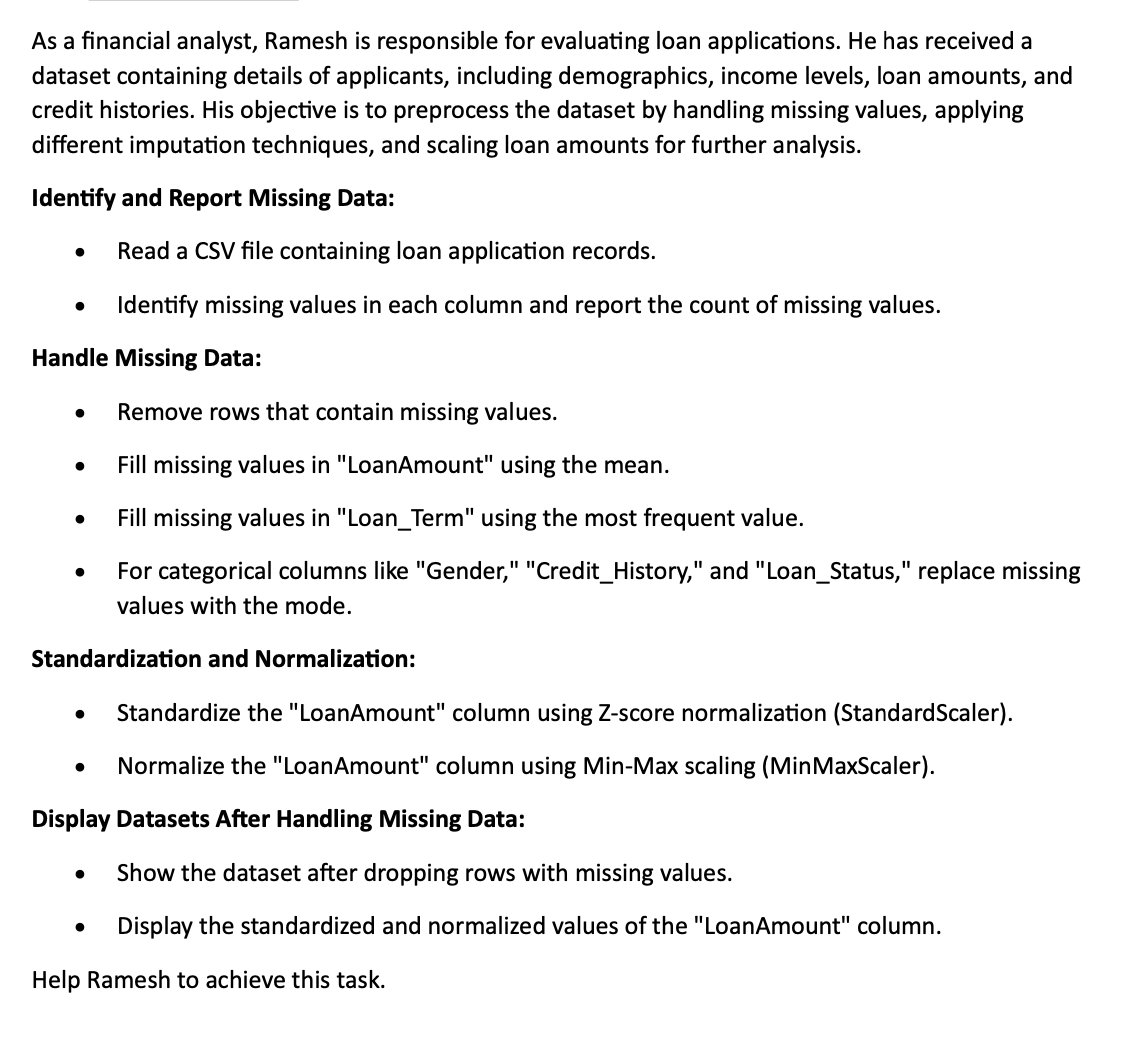

In [ ]:
import pandas as pd
import os
import sys
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load dataset
file_path = os.path.join(sys.path[0], "loan_data.csv")
df = pd.read_csv(file_path)

# Identify and report missing values
missing_values = df.isnull().sum()
print("Missing Data Count:\n", missing_values.to_string(index=True))

# Remove rows with missing values
df_dropna = df.dropna()
print("\nDataset after dropping missing values:")
print(df_dropna.to_string(index=False))

# Handle missing values with different imputation techniques
df_imputed = df.copy()

# Fill missing values in "LoanAmount" using the mean
if 'LoanAmount' in df.columns:
    mean_imputer = SimpleImputer(strategy='mean')
    df_imputed[['LoanAmount']] = mean_imputer.fit_transform(df[['LoanAmount']])

# Fill missing values in "Loan_Term" using the most frequent value
if 'Loan_Term' in df.columns:
    mode_imputer = SimpleImputer(strategy='most_frequent')
    df_imputed[['Loan_Term']] = mode_imputer.fit_transform(df[['Loan_Term']])

# Fill missing values in categorical columns using the mode
categorical_cols = ["Gender", "Credit_History", "Loan_Status"]
for col in categorical_cols:
    if col in df.columns:
        df_imputed[col].fillna(df_imputed[col].mode()[0], inplace=True)

# Standardization (Z-score normalization) of "LoanAmount"
if 'LoanAmount' in df.columns:
    scaler = StandardScaler()
    df_imputed['LoanAmount_Standardized'] = scaler.fit_transform(df_imputed[['LoanAmount']])

    # Min-Max normalization of "LoanAmount"
    normalizer = MinMaxScaler()
    df_imputed['LoanAmount_Normalized'] = normalizer.fit_transform(df_imputed[['LoanAmount']])

# Display Standardized and Normalized LoanAmount
print("\nStandardized LoanAmount:")
print(df_imputed[['LoanAmount_Standardized']].to_string(index=False))

print("\nNormalized LoanAmount:")
print(df_imputed[['LoanAmount_Normalized']].to_string(index=False))

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the dataset
file_path = "loan_data.csv"  # Replace with the actual file path
df = pd.read_csv(file_path)

# Identify and report missing values
missing_values = df.isnull().sum()
print("Missing Values Count:\n", missing_values)

# Handle missing values
df_dropped = df.dropna()  # Remove rows with missing values

df_filled = df.copy()
df_filled["LoanAmount"].fillna(df_filled["LoanAmount"].mean(), inplace=True)
df_filled["Loan_Term"].fillna(df_filled["Loan_Term"].mode()[0], inplace=True)
for col in ["Gender", "Credit_History", "Loan_Status"]:
    df_filled[col].fillna(df_filled[col].mode()[0], inplace=True)

# Standardization using Z-score
scaler = StandardScaler()
df_filled["LoanAmount_Standardized"] = scaler.fit_transform(df_filled[["LoanAmount"]])

# Normalization using Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_filled["LoanAmount_Normalized"] = minmax_scaler.fit_transform(df_filled[["LoanAmount"]])

# Display results
print("\nDataset after dropping missing values:\n", df_dropped.head())
print("\nStandardized LoanAmount:\n", df_filled["LoanAmount_Standardized"].head())
print("\nNormalized LoanAmount:\n", df_filled["LoanAmount_Normalized"].head())

# Save processed data if needed
df_filled.to_csv("processed_loan_data.csv", index=False)
